In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
from tqdm import tqdm

## fonction util

In [2]:
# Split sequence into samples
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        # Find the end of patern
        end_ix = i + n_steps
        # Check if are beyond the ssquence
        if end_ix > len(sequence):
            break
        # Gather input and output part of the pathern
        seq_x,seq_y= sequence[i:end_ix,:-1],sequence[end_ix-1,-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)


def action(price):
    x = list()
    for i in range(1, len(price) - 1):  # ajustement de la boucle pour éviter un index hors limites
        if price[i-1] > price[i] < price[i+1]:
            x.append(1)
        elif price[i-1] < price[i] > price[i+1]:
            x.append(2)
        else:
            x.append(0)
    return x

## Traitement des données

In [3]:
# Importation des données
data = pd.read_csv('DATA.csv')
print(data.head())

          date    prix
0  25-Mar-1985  0.6877
1  26-Mar-1985  0.6938
2  27-Mar-1985  0.7077
3  28-Mar-1985  0.7124
4  29-Mar-1985  0.7209


In [4]:
# Preparation des données pour l'entrainnement
price = data['prix']
ToDo=action(price)

# Initialisation des listes pour in_seq1, in_seq2 et out_seq
in_seq1 = []
in_seq2 = []
out_seq = []

# Bouclons à travers les valeurs de 'data'
for i in range(0, len(data), 3):
    if i < len(data):
        in_seq1.append(data['prix'][i])
    if i + 1 < len(data):
        in_seq2.append(data['prix'][i + 1])
    if i + 2 < len(data):
        out_seq.append(data['prix'][i + 2])

# Conversion des listes en tableaux numpy
in_seq1 = np.array(in_seq1)
in_seq2 = np.array(in_seq2)
out_seq = np.array(out_seq)

print("in_seq1:", in_seq1)
print("in_seq2:", in_seq2)
print("out_seq:", out_seq)

in_seq1: [0.6877 0.7124 0.7209 ... 1.0666 1.0767 1.0759]
in_seq2: [0.6938 0.7209 0.7167 ... 1.0605 1.0666 1.0855]
out_seq: [0.7077 0.7209 0.7082 ... 1.0666 1.0719 1.083 ]


In [5]:
# Convertion des sequence en structure [ligne colonne]
in_seq1 = in_seq1.reshape(len(in_seq1), 1)
in_seq2 = in_seq2.reshape(len(in_seq2), 1)
out_seq = out_seq.reshape(len(out_seq), 1)
print(out_seq)

[[0.7077]
 [0.7209]
 [0.7082]
 ...
 [1.0666]
 [1.0719]
 [1.083 ]]


In [6]:
# Partionnage 80% 20%
border = int(len(in_seq1) * 0.8)

in_seq1_train = in_seq1[:border]
in_seq2_train = in_seq2[:border]
out_seq_train = out_seq[:border]

in_seq1_test = in_seq1[border:-1]
in_seq2_test = in_seq2[border:]
out_seq_test = out_seq[border:]

print('Donnée d\'entrainnement:\n', in_seq1_train)
print('Donées de test:\n', in_seq1_test)

Donnée d'entrainnement:
 [[0.6877]
 [0.7124]
 [0.7209]
 ...
 [1.0968]
 [1.1157]
 [1.1107]]
Donées de test:
 [[1.1021]
 [1.1389]
 [1.162 ]
 [1.1245]
 [1.1179]
 [1.1227]
 [1.1147]
 [1.12  ]
 [1.134 ]
 [1.1321]
 [1.1437]
 [1.1305]
 [1.1187]
 [1.1195]
 [1.1249]
 [1.1211]
 [1.1185]
 [1.1279]
 [1.1358]
 [1.1473]
 [1.1347]
 [1.1345]
 [1.1018]
 [1.1056]
 [1.0976]
 [1.1006]
 [1.0863]
 [1.0741]
 [1.0724]
 [1.0779]
 [1.0686]
 [1.0734]
 [1.0646]
 [1.0627]
 [1.0593]
 [1.0631]
 [1.0886]
 [1.0835]
 [1.0941]
 [1.0989]
 [1.0913]
 [1.0868]
 [1.0955]
 [1.0977]
 [1.0968]
 [1.0861]
 [1.086 ]
 [1.0781]
 [1.0932]
 [1.0857]
 [1.0917]
 [1.0892]
 [1.0874]
 [1.0797]
 [1.0893]
 [1.0837]
 [1.0919]
 [1.1159]
 [1.1198]
 [1.1324]
 [1.126 ]
 [1.1128]
 [1.1134]
 [1.102 ]
 [1.0934]
 [1.0873]
 [1.0957]
 [1.1004]
 [1.0999]
 [1.1153]
 [1.1109]
 [1.127 ]
 [1.1241]
 [1.1174]
 [1.1166]
 [1.1338]
 [1.1387]
 [1.1384]
 [1.1401]
 [1.1408]
 [1.1268]
 [1.1283]
 [1.1297]
 [1.1233]
 [1.1298]
 [1.1456]
 [1.1532]
 [1.1405]
 [1.1405]
 [

In [7]:
# Concataination horizontal
dataset_train = np.hstack((in_seq1_train,in_seq2_train,out_seq_train))
dataset_test = np.hstack((in_seq1_test,in_seq2_test,out_seq_test))
print(dataset_train)

[[0.6877 0.6938 0.7077]
 [0.7124 0.7209 0.7209]
 [0.7209 0.7167 0.7082]
 ...
 [1.0968 1.1019 1.104 ]
 [1.1157 1.1149 1.1107]
 [1.1107 1.1107 1.1081]]


In [8]:
# Define the time support
n_steps = 1

# Split the data into samples
X_train,y_train = split_sequence(dataset_train,n_steps)
X_test,y_test = split_sequence(dataset_test,n_steps)

# Summurise the data
for i in range(len(X_train)):
    print(X_train[i],y_train[i])

[[0.6877 0.6938]] 0.7077
[[0.7124 0.7209]] 0.7209
[[0.7209 0.7167]] 0.7082
[[0.7132 0.7033]] 0.7033
[[0.7033 0.7033]] 0.7033
[[0.7041 0.7129]] 0.7222
[[0.7237 0.7237]] 0.7237
[[0.7376 0.7369]] 0.737
[[0.7441 0.7476]] 0.7476
[[0.7476 0.7429]] 0.7288
[[0.713  0.7078]] 0.7109
[[0.7109 0.7109]] 0.7132
[[0.7174 0.7073]] 0.7041
[[0.6948 0.6948]] 0.6948
[[0.6948 0.7012]] 0.6978
[[0.7122 0.7146]] 0.7146
[[0.7146 0.7212]] 0.7287
[[0.7248 0.7184]] 0.7228
[[0.7228 0.7228]] 0.735
[[0.7233 0.725 ]] 0.7193
[[0.7203 0.7203]] 0.7203
[[0.7203 0.7154]] 0.7207
[[0.7221 0.7279]] 0.7279
[[0.7279 0.7289]] 0.7306
[[0.7244 0.728 ]] 0.7231
[[0.7231 0.7231]] 0.7177
[[0.7217 0.721 ]] 0.7185
[[0.7262 0.7262]] 0.7262
[[0.7251 0.7318]] 0.7365
[[0.7236 0.7239]] 0.7239
[[0.7239 0.7252]] 0.7244
[[0.7302 0.7283]] 0.7352
[[0.7352 0.7352]] 0.7324
[[0.7293 0.7335]] 0.7331
[[0.7377 0.7377]] 0.7377
[[0.7406 0.7511]] 0.7565
[[0.7572 0.7683]] 0.7683
[[0.7683 0.7699]] 0.7704
[[0.7826 0.7731]] 0.7654
[[0.7654 0.7654]] 0.7631
[[

In [9]:
# Applatissement des entrées
n_inputs_train = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0],n_inputs_train))

n_inputs_test = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape((X_test.shape[0],n_inputs_test))
print('\n Flatten inputs : \n', X_train)


 Flatten inputs : 
 [[0.6877 0.6938]
 [0.7124 0.7209]
 [0.7209 0.7167]
 ...
 [1.0968 1.1019]
 [1.1157 1.1149]
 [1.1107 1.1107]]


In [10]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Reshape((10, -1)),
        keras.layers.LSTM(50, activation='relu', return_sequences=False),
        keras.layers.Dense(1)
    ]
)

model.compile(optimizer = 'adam', loss = 'mse')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(X_train,y_train,epochs=500,verbose=0)

In [12]:
# Make prediction
pred = model.predict(X_test,verbose=0)
print('Prédiction de test :\n',pred[0,0],'\n ')
print('Valeur réelle: ',y_test[0])

Prédiction de test :
 1.1181498 
 
Valeur réelle:  1.1242


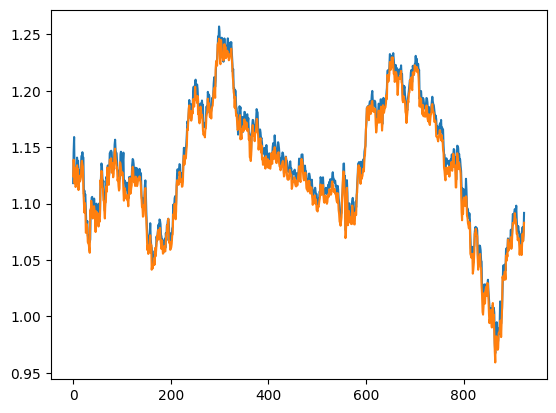

In [13]:
plt.plot(pred)
plt.plot(y_test)
plt.show()

In [14]:
# Erreure RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

z=rmse(pred,y_test)

print('RMSE: ',z)

RMSE:  0.07845065570653731


In [ ]:
errors=list()
couche1=list()
couche2=list()
couche3=list()

for i in range(1,10):
    print(i)
    for j in range(1,10):
        for k in range(1,10):
            model = keras.Sequential(
                [
                keras.layers.Dense(i, activation = 'relu', input_dim = 2),
                keras.layers.Dense(j, activation = 'relu'),
                keras.layers.Reshape((j, -1)),
                keras.layers.LSTM(k, activation='relu', return_sequences=False),
                keras.layers.Dense(1),
                ]
            )
        
            model.compile(optimizer = 'adam', loss = 'mse')

            model.fit(X_train,y_train,epochs=100,verbose=0)

            pred = model.predict(X_test,verbose=0)
    
            errors_value=rmse(pred,y_test)
            errors.append(errors_value)
            couche1.append(i)
            couche2.append(j)
            couche3.append(k)

1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
plt.figure()      
plt.plot(errors)
plt.title("Erreur RMSE")
plt.show()

In [ ]:
plt.figure()
plt.plot(couche1)
plt.plot(couche2)
plt.plot(couche3)
plt.legend("C1","C2","C3")